<a href="https://colab.research.google.com/github/joshbgarfinkel/MachineLearning/blob/main/Assignement4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter # Counter is a very useful data structure for counting the frequency of occurence
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PHYS486_786/
#drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/PHYS486_786


Load the imdb dataset

In [ ]:
path = 'datasets/imdb/imdb.csv'
imdb_dataset = pd.read_csv(path)

Create a big string $X$ of all reviews

In [ ]:
reviews = imdb_dataset['review'].values
all_reviews = ''.join(reviews)
total_chars = len(all_reviews)

Let $\chi$ denote the set of unique characters in the concatenated string $X$.

We can easily estimate $\chi$ by converting $X$ into a set.

In [ ]:
chi = list(set(all_reviews))
print(fr'Size of set $\chi$: {len(chi)}')
print(chi)


Size of set $\chi$: 206
['ó', '}', 'r', '?', 'כ', 'õ', 'j', '\x8d', 'ר', 'v', 'Ä', 't', '¡', '9', 'î', 'ú', '©', 'Ø', '\x80', '\x97', '&', 'ð', 'ğ', '、', 'ü', '▼', 'ן', '£', 'O', '1', ']', '!', 'R', '/', ',', 'V', '(', '¨', '%', 'I', 'å', '\x9a', 'ô', 'H', 'ï', 'ı', '\x10', '’', '{', '¦', 'Ï', 'Ð', 'y', 'E', '«', 'm', 'S', '¢', '¾', '★', '@', '½', 'Q', 'w', '<', 'Æ', 'e', '\x85', '§', 'Õ', '\uf0b7', '®', 'u', '7', 'Á', '”', 'D', '*', '\x91', '¤', '₤', '$', 'ª', '8', 'æ', '~', '“', '»', 'a', '>', 'h', 'M', 'p', '^', 'ל', 'ø', '0', 'ä', 'Þ', '\x9e', 'N', 'g', 'Y', 'J', 'À', 'P', '#', 'י', '2', '…', 'א', 'z', '´', '6', 'ù', 'ê', 'Ç', 'Z', 'ë', 'b', 'è', ')', '"', 'ß', 'á', '‘', 'A', '°', '-', 'ã', 'º', ' ', '³', 'C', 'Ü', 'é', 's', 'í', '[', '\t', 'l', ':', '5', 'ו', '3', 'F', '·', 'Ó', 'Ê', '\xad', 'd', 'x', 'ò', '\x96', 'q', '–', 'ג', '\x08', '，', 'T', 'L', '|', 'מ', '=', 'â', 'X', 'i', 'n', '4', '.', 'ý', 'o', '\x8e', '″', ';', '+', 'È', '_', '\xa0', 'ç', 'Ż', '¿', 'G', 'û', '\\', 'Â',

The set $\chi$ has $206$ unique elements. Let us calculate the empirical probability of each character.

### Part 1: Model the text as an independent sequence of characters

Task (a): Calculate the probability $p(x)$ for each character $x \in \chi$

In [ ]:
hist = Counter(all_reviews)
for key in hist:
  hist[key] = hist[key] / total_chars
print(hist)

Counter({' ': 0.1757602626520945, 'e': 0.09220051927592185, 't': 0.06973298982942988, 'a': 0.06077881063181167, 'o': 0.05734573173621624, 'i': 0.05581178304451654, 's': 0.05104892046928902, 'n': 0.05073004914760611, 'r': 0.045869525834205456, 'h': 0.041264472259103804, 'l': 0.03352343065769131, 'd': 0.02619817269946759, 'c': 0.020642996528370008, 'u': 0.020551888254487817, 'm': 0.02012683340891069, 'f': 0.01657235827512319, 'y': 0.01575837114352156, 'g': 0.015520084440950543, 'w': 0.01429908083283379, 'b': 0.014199067927992113, 'p': 0.012588796010041063, '.': 0.009935918579353649, 'v': 0.00943800766228984, ',': 0.008321446363780202, 'k': 0.0063334684098136, 'I': 0.004039617146079219, "'": 0.004028620003213304, 'T': 0.003360696312204365, '/': 0.0032948661931042384, '>': 0.0030891279786544237, '<': 0.0030867452643668085, '-': 0.002016723263513339, '"': 0.00201397397779686, 'A': 0.001979210787292942, 'S': 0.0018259228347897241, 'B': 0.0013593843225128423, 'x': 0.0012830763700710252, 'M': 

Next, let us plot the sorted probabilities

Task (b): Plot the sorted probabilities on the y axis against the sorted characters on the x axis

Text(0, 0.5, 'Sorted probabilities')

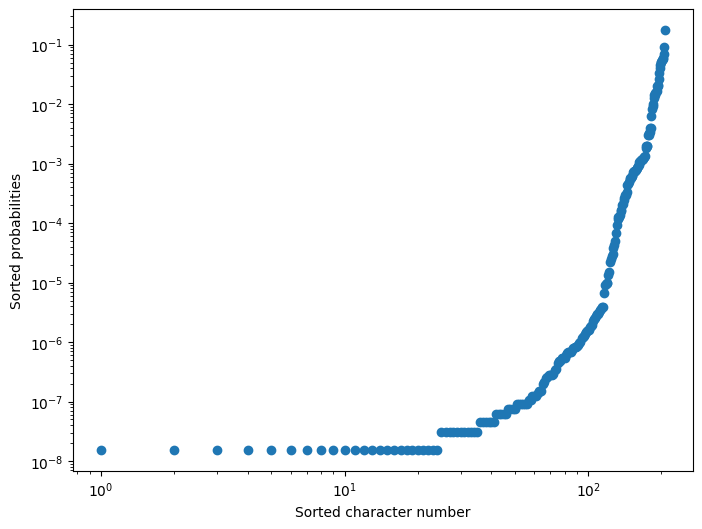

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
# instead of the keys on the x axis, plot numbers
numbers = len(chi)
ax.scatter(np.arange(1, len(hist)+1), np.sort(np.array(list(hist.values()))))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Sorted character number')
ax.set_ylabel('Sorted probabilities')

Next, let us calculate the entropy of string of length N.

Task (c): Assuming that each character is independent, compute entropy $S_N$ of an $N = 100$ character string

Solution: $$S_N = - N \sum_{x \in A} p(x) \log p(x) $$

In [ ]:
N = 100
randString = ''.join(all_reviews[:N])
print(randString)
char_probs = np.array([hist[char] for char in randString])

SN = -N * np.sum(char_probs * np.log2(char_probs))

# Compare to uniform distribution with prob 1 / |Chi|
print(f'Entropy of N string: {SN:0.2f}')

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. The
Entropy of N string: 2374.05


Let us compare it with the entropy if we did not have any information about the probabilities (assume that every character is equally likely)

In [ ]:
S_uni = N * np.log2(len(chi))
print(f'Entropy of uniform distribution: {S_uni:0.4f}')

Entropy of uniform distribution: 768.6501


### Part 2: Model the string using bigrams (pairs of characters)

Instead of modeling the text as independent characters, model the text using the joint distribution of pair of characters

Let us denote the probability of pair of characters $x, y \in \chi$ as $p(x, y)$

Task (a): Calculate joint distribution of pair of characters $p(x, y)$

In [ ]:
pair_freqs = Counter(zip(all_reviews[:], all_reviews[1:]))
sumFreq = np.sum(list(pair_freqs.values()))
pairFreqs = {}
for key in pair_freqs:
  pairFreqs[key] = pair_freqs[key] / sumFreq

In [ ]:
print(pairFreqs)
#print(list(pairFreqs.values()))
#print(np.sum(list(pairFreqs.values())))

{('O', 'n'): 0.00013231701403128534, ('n', 'e'): 0.004270175366246866, ('e', ' '): 0.03015893162755426, (' ', 'o'): 0.009405184389249987, ('o', 'f'): 0.004802024696223016, ('f', ' '): 0.005376243574499152, (' ', 't'): 0.023809150692170874, ('t', 'h'): 0.02036991639880223, ('h', 'e'): 0.017539389246168754, ('o', 't'): 0.0031871706107461945, ('e', 'r'): 0.01203397506245079, ('r', ' '): 0.010798430768784305, (' ', 'r'): 0.003288848362380301, ('r', 'e'): 0.010088152793083408, ('e', 'v'): 0.0019571096147868805, ('v', 'i'): 0.002934068309059431, ('i', 'e'): 0.0036605212493059963, ('e', 'w'): 0.0007395884166481472, ('w', 'e'): 0.0017269027539442705, ('r', 's'): 0.0025145578499363463, ('s', ' '): 0.021371236819656782, (' ', 'h'): 0.006852946050612823, ('h', 'a'): 0.006779341561334656, ('a', 's'): 0.005581034815885679, (' ', 'm'): 0.00703731620833782, ('m', 'e'): 0.004699797087437215, ('e', 'n'): 0.007834379971147774, ('n', 't'): 0.004381964379948237, ('t', 'i'): 0.005150466118489634, ('i', 'o'

Next, let us estimate the conditional probability of observing $x$ given the preceding character $y$

Task (b): Compute the conditional probabilties $p(x | y)$ for each $y \in \chi$ and compute the conditional probabilities

$$S_{X | Y = y} = - \sum_{x} p(x | y) \log p(x|y) $$

In [ ]:
SXy = {}
strTup = tuple(zip(randString[:], randString[1:]))
pXy = {}
for tup in strTup:
    pXy[tup] = pairFreqs[tup] / hist[tup[0]]


for i in range(len(chi)):
    for tup in strTup:
        if tup[0] == chi[i]:
            if chi[i] not in SXy:
                SXy[chi[i]] = 0
            SXy[chi[i]] += -pXy[tup] * np.log2(pXy[tup])

print('S(X|Y=y) = ', SXy)


SXY = np.sum([hist[char] * SXy[char] for char in list(SXy.keys())])
print('S(X|Y) = ', SXY)

S(X|Y=y) =  {'r': 1.692664240313812, 'j': 0.4858447082079594, 'v': 0.524009589245905, 't': 3.1994925877544356, 'O': 0.4660076155581027, '1': 0.30079390470532186, 'y': 0.32051467594982974, 'm': 0.49000695802974953, 'w': 0.8526800800249797, 'e': 4.249597581905498, 'u': 0.4456574131318548, 'a': 1.1089970050421196, 'h': 3.152527949187591, 'p': 0.2728333125526435, 'g': 0.5302588847116129, 'z': 0.2581140714177471, 'b': 0.4907331071915522, ' ': 2.987545768841648, 's': 1.659170404448871, 'l': 0.7704476520674945, 'd': 1.0010419697531632, 'T': 0.3485365896938068, 'i': 1.3811152979001189, 'n': 1.305988244525024, '.': 0.3799687584705005, 'o': 1.6494474584071823, "'": 0.12368866909630491, 'f': 0.6672816286594312, 'k': 0.5299768650193883, 'c': 0.4283777061938004}
S(X|Y) =  1.879643431351269


Next, let us calculate the conditional probability (equation 25 of the notes)



$$S_{X | Y} = \sum_y p(y) S_{X | Y = y}$$


Task (c): Assuming that each character only depends on the preceding character, compute the entropy of N character string.

Note: It might be useful to solve Problem 1 of Assignment-5 Part II

In [ ]:
N = 100
#randString = [all_reviews[np.random.randint(low=0, high=len(all_reviews))] for _ in range(N)]
#randString = ''.join(randString)
randString = ''.join(all_reviews[:N])
#randString = ''.join(['N']*100)
print(randString)

#estimate the entropy of the sequence modeled using pairs of characters
SXcY = SXY+SN



total_entropy = SXcY
print(f'Entropy on modeling the text as bigrams: {total_entropy:0.4f}')

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. The
Entropy on modeling the text as bigrams: 2375.9250
